In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
X = pd.read_json('../generate_data/data.json' , orient="records")
y = [random.choice([0,1]) for _ in range(0, 100)]


In [15]:
geolocation = X['location [lat, lng]'].str.split(', ', n=1, expand=True)
X['lat'] = geolocation[0]
X['lng'] = geolocation[1]
X['2,4 GHz'] = X['2,4 GHz'].astype(int)
X['5 GHz'] = X['5 GHz'].astype(int)
X = X.drop(columns=['location [lat, lng]', 'price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
X_train.head()

,duration [min],maximum velocity at rated value [km/h],max. monitoring radius [m],"2,4 GHz",5 GHz,energy consumption [kW/h],lat,lng
57,92,64,21,0,0,2.94,48.4064488,13.0406136
75,83,80,15,1,1,4.96,47.1827607,12.7634953
32,97,14,2,0,1,7.05,51.3363614,8.2455452
94,15,83,34,0,0,5.50,50.9226790,7.7462348
59,39,84,59,0,0,4.82,51.6206706,8.2822558


In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

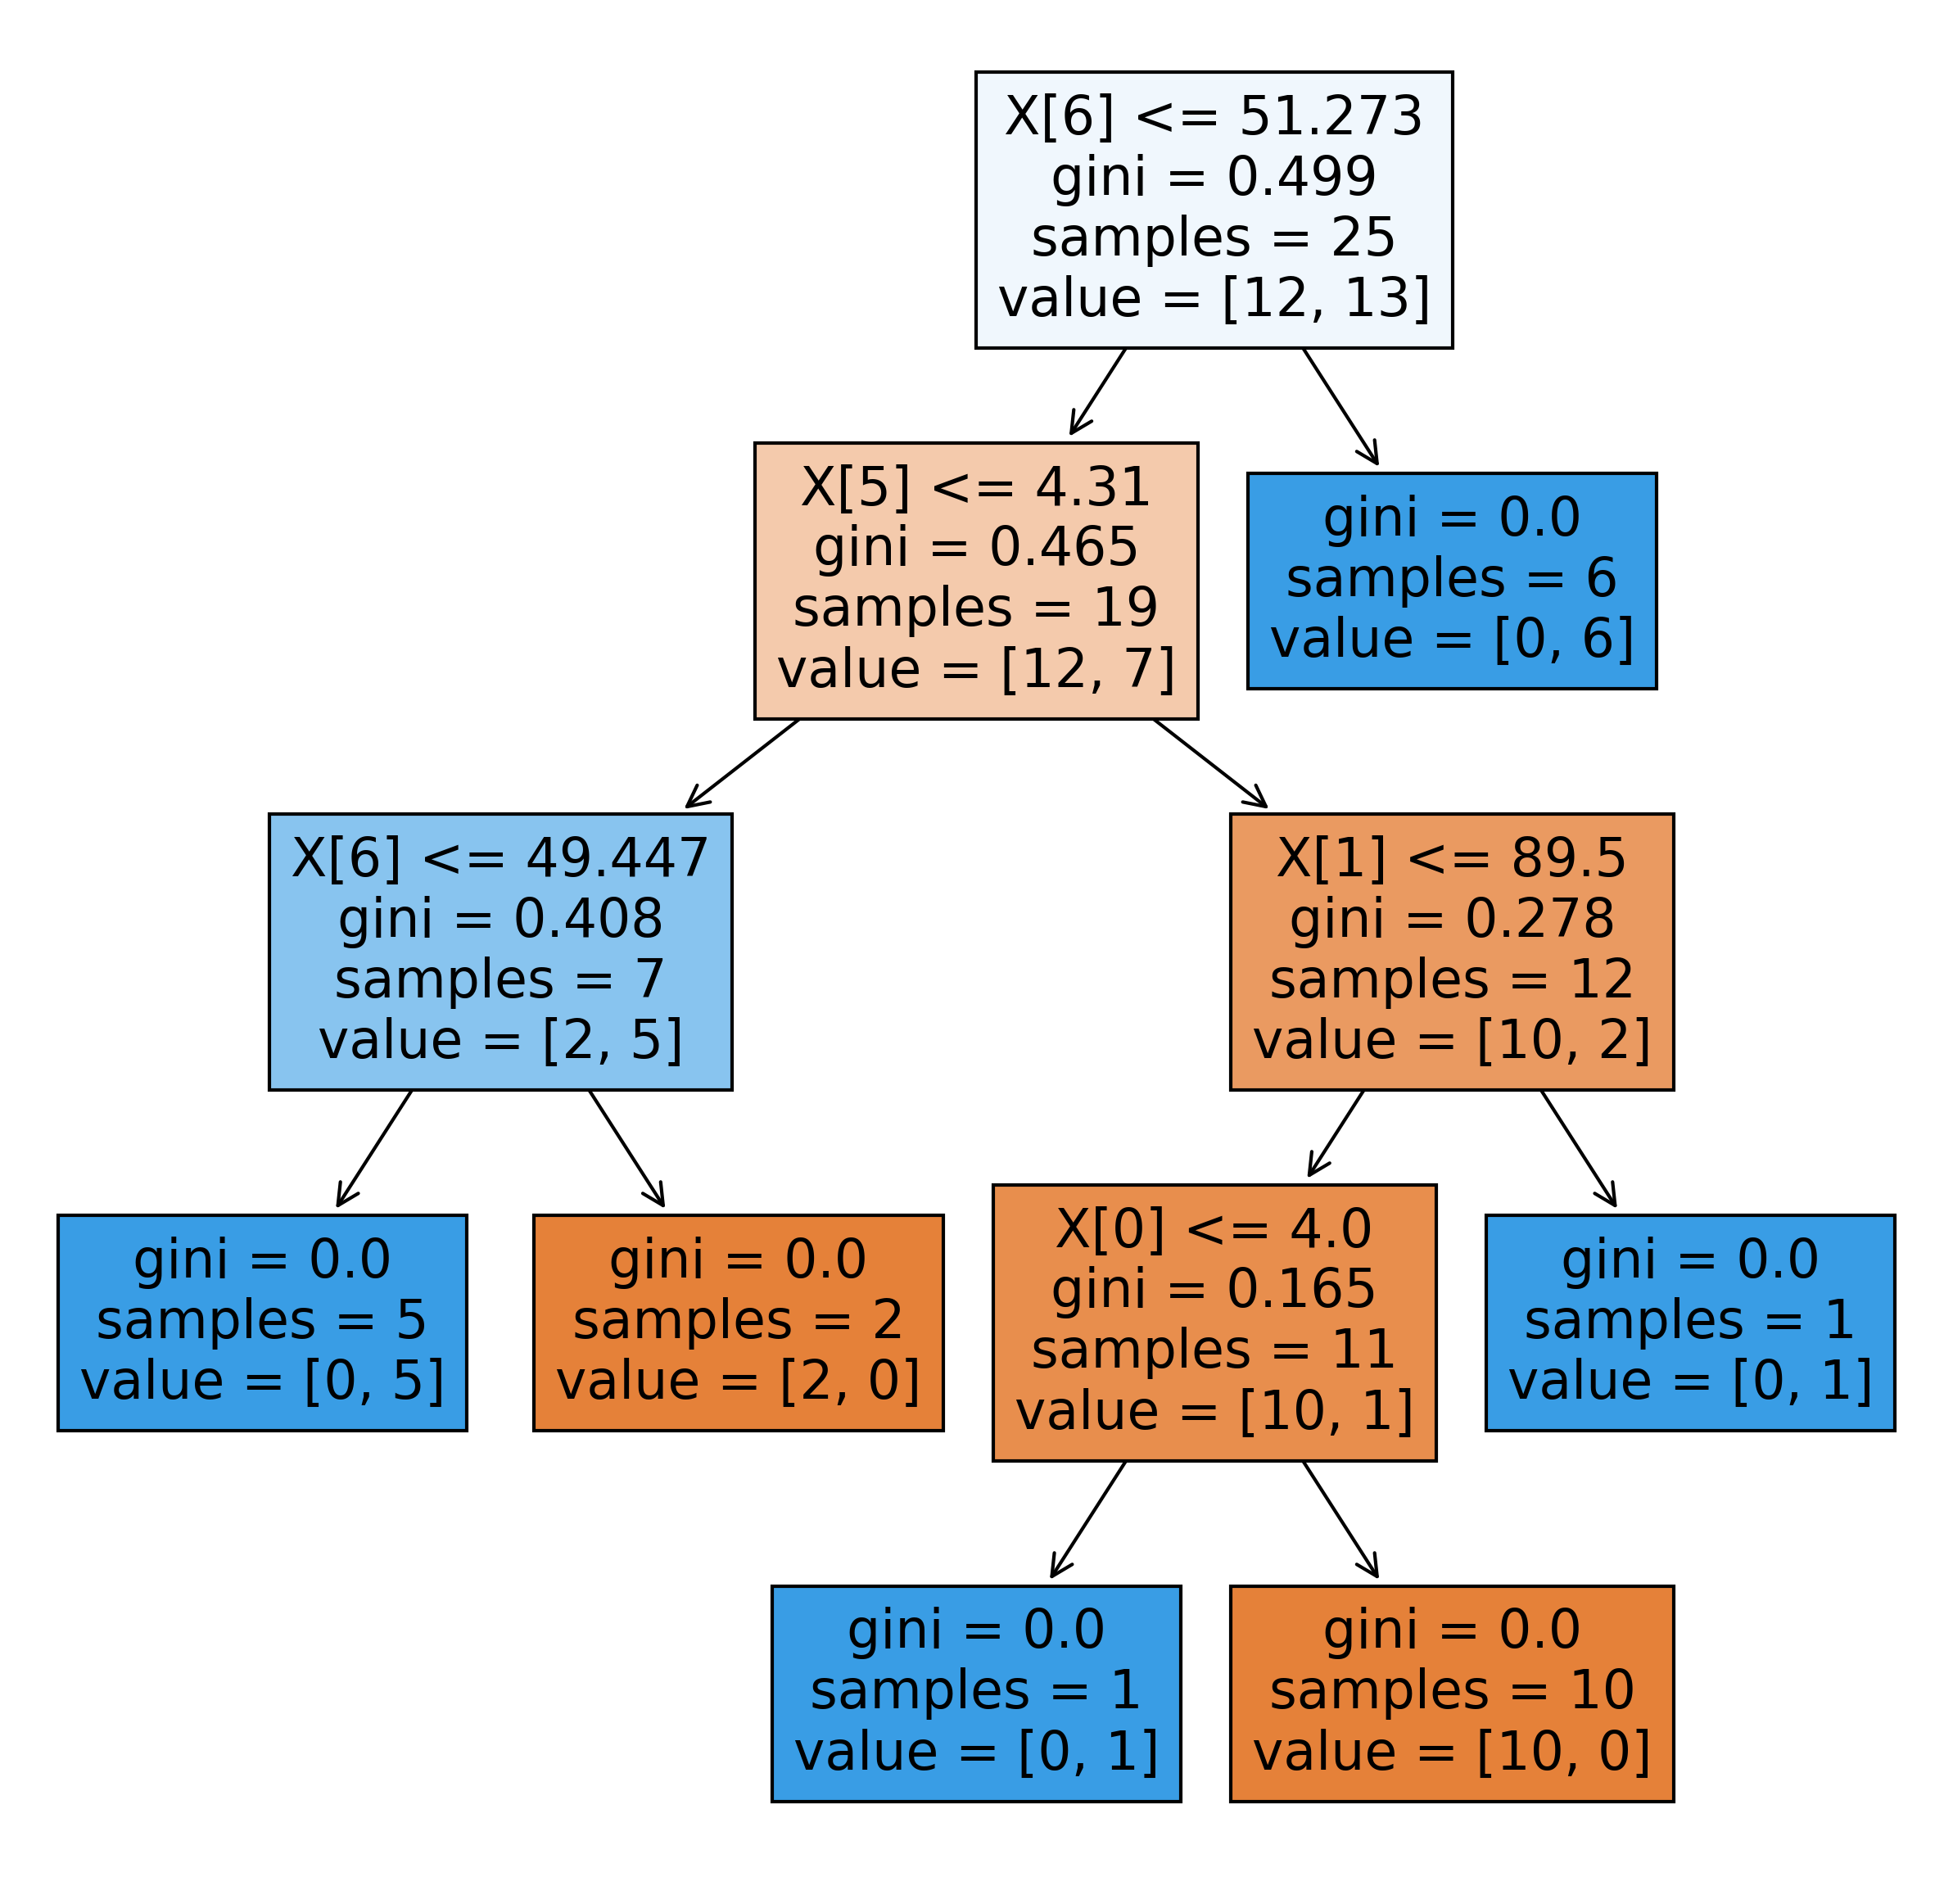

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
x = tree.plot_tree(clf, filled=True) 

In [ ]:
test = X.iloc[3]
clf.predict([test])